___

In [52]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

___
**_Bitte beachten:_**

- In Code-Zellen soll (bei Bedarf kommentierter) Code eingefügt werden. In Raw-Zellen erwarten wir Antworten im Freitext-Format.
- Fragestellungen sind teilweise bewusst etwas offener formuliert, weil Sie auch im Arbeitsleben nur selten mit ganz spezifischen Anweisungen rechnen können.Es gibt häufig mehrere mögliche Lösungen, dies wird in der Korrektur  berücksichtigt.

___

# (I can't get no) satisfaction
Wir arbeiten weiterhin mit dem Datensatz über die Zufriedenheit von Angestellten einer fiktiven Firma. In dieser Kurseinheit werden wir einige Techniken zur Datenvisualisierung anwenden.

*Hinweise:*
- *Für die Visualisierungsaufgaben gibt es meist unterschiedliche Lösungswege. Wir verwenden in den meisten Fällen die Bibliothek `matplotlib`. Sie können die Aufgaben auch mit anderen Bibliotheken, wie z.B. `seaborn`, lösen. Denken Sie in dem Fall daran, die entsprechende Bibliothek zu installieren und zu importieren.*
- *Denken Sie bei der Erstellung der Plots an Titel und Achsenbeschriftung!*

**Daten laden**

Wir verwenden nun den transformierten Datensatz aus KE3. Sollten Sie die Aufgaben aus KE3 erfolgreich absolviert haben, können Sie Ihren Datensatz verwenden, ansonsten finden Sie die entsprechende csv-Datei (`employees_satisfaction_transformed.csv`) im Moodle.

In [53]:
# Datensatz laden
# Laden Sie den Datensatz wieder so, dass die erste Spalte als Index (Row Label) verwendet wird
# Wir verwenden hier den transformierten Datensatz aus KE3
df = pd.read_csv("./data/employees_satisfaction_transformed.csv", index_col=0)
df

,age,department,education,recruitment_type,job_level,rating,awards,certifications,salary,gender,entry_date,satisfied
0,28,HR,Postgraduate,Referral,5,2.0,1,0,78075.0,Male,2019-02-01,1
1,50,Technology,Postgraduate,Recruitment Agency,3,5.0,2,1,38177.1,Male,2017-01-17,0
2,43,Technology,Undergrad,Referral,4,1.0,2,0,59143.5,Female,2012-08-27,1
3,44,Sales,Postgraduate,On-Campus,2,3.0,0,0,26824.5,Female,2017-07-25,1
4,33,HR,Undergrad,Recruitment Agency,2,1.0,5,0,26824.5,Male,2019-05-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Postgraduate,On-Campus,2,5.0,6,0,26824.5,Male,2014-03-21,1
496,24,Technology,Undergrad,Referral,2,4.0,2,0,26824.5,Female,2018-02-20,0
497,34,Marketing,Postgraduate,On-Campus,1,Unavailable,2,0,21668.4,Male,2020-10-20,1
498,26,Technology,Undergrad,Walk-in,2,1.0,1,1,26824.5,Male,2012-05-18,0


Für Datumsberechnungen wandeln wir wieder den Datentyp von `entry_date` um.

In [54]:
df["entry_date"] = pd.to_datetime(df["entry_date"], format="%Y-%m-%d")

In [55]:
df

,age,department,education,recruitment_type,job_level,rating,awards,certifications,salary,gender,entry_date,satisfied
0,28,HR,Postgraduate,Referral,5,2.0,1,0,78075.0,Male,2019-02-01,1
1,50,Technology,Postgraduate,Recruitment Agency,3,5.0,2,1,38177.1,Male,2017-01-17,0
2,43,Technology,Undergrad,Referral,4,1.0,2,0,59143.5,Female,2012-08-27,1
3,44,Sales,Postgraduate,On-Campus,2,3.0,0,0,26824.5,Female,2017-07-25,1
4,33,HR,Undergrad,Recruitment Agency,2,1.0,5,0,26824.5,Male,2019-05-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Postgraduate,On-Campus,2,5.0,6,0,26824.5,Male,2014-03-21,1
496,24,Technology,Undergrad,Referral,2,4.0,2,0,26824.5,Female,2018-02-20,0
497,34,Marketing,Postgraduate,On-Campus,1,Unavailable,2,0,21668.4,Male,2020-10-20,1
498,26,Technology,Undergrad,Walk-in,2,1.0,1,1,26824.5,Male,2012-05-18,0


## Data Analysis

### Alter

**Wie ist das durchschnittliche Alter der Angestellten? Unterscheidet sich dieses, in Abhängigkeit von der Abteilung?**

In [56]:
# Ihre Lösung
print("Das Durchschnittliche Alter der Angestellten ist "+ str(df["age"].mean()))

Das Durchschnittliche Alter der Angestellten ist 39.694


In [57]:
print("Das Durchschnittliche Alter der Angestellten Abhängig von der Abteilung ist "+ str(df.groupby("department")["age"].mean()))

Das Durchschnittliche Alter der Angestellten Abhängig von der Abteilung ist department
HR            39.367925
Marketing     38.926316
Purchasing    40.140351
Sales         38.816092
Technology    41.051020
Name: age, dtype: float64


**In welcher Abteilung arbeitet der älteste Mann, in welcher die jüngste Frau?**

In [79]:
# Ihre Lösung
#males['gender'].max()
#maximum age of each department

males = df[df["gender"]=="Male"]
females = df[df["gender"]=="Female"]

#age_oldest_male = males["age"].max()
#department_of_eldest_man = list(males[males["age"]==age_oldest_male]["department"])

def department_of_eldest(df):
    return list(df[df["age"]==df["age"].max()]["department"])[0]

def department_of_youngest(df):
    return list(df[df["age"]==df["age"].min()]["department"])[0]


In [83]:
# Abteilung ältester Mann
print("oldest male works in the department of " + department_of_eldest(males))
print("oldest female works in the department of " + department_of_eldest(females))

oldest male works in the department of Technology
oldest female works in the department of Technology


In [84]:
# Abteilung älteste Frau
print("youngest female works in the department of " + department_of_youngest(females))
print("youngest male works in the department of " + department_of_youngest(males))

youngest female works in the department of HR
youngest male works in the department of Technology


### Awards

**Wie ist die durchschnittliche Anzahl Awards? Wie ist der Median? Welcher Wert ist aussagekräftiger?**

<Axes: >

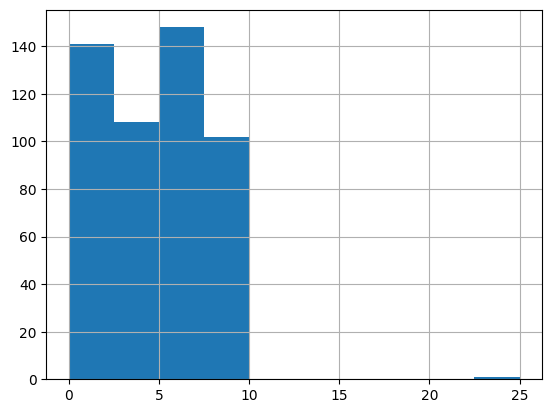

In [90]:
# Ihre Lösung
df['awards'].hist()

In [88]:
# Mean
df['awards'].mean()

4.57

In [89]:
# Median
df['awards'].median()

5.0

### Zufriedenheit

**In welcher Abteilung sind die meisten zufriedenen Angestellten?**

In [146]:
# Ihre Lösung
satisfied = df[df['satisfied'] == 1]
satisfied['department'].value_counts()
#or
temp = satisfied.groupby('department')['satisfied'].sum().reset_index()
temp[temp['satisfied']==temp['satisfied'].max()]

,department,satisfied
2,Purchasing,80


**Und in welcher Abteilung sind die Angestellten im Schnitt am zufriedensten?**

In [130]:
# Ihre Lösung
df.groupby('department')['satisfied'].mean()

department
HR            0.688679
Marketing     0.642105
Purchasing    0.701754
Sales         0.804598
Technology    0.744898
Name: satisfied, dtype: float64

### Fairness

**Gender Pay Gap**

Bekommen Männer und Frauen der fiktiven Firma das gleiche Gehalt?

In [155]:
# Ihre Analysen

#Gehalt basierend auf Geschlecht
print(males['salary'].mean())
print(females['salary'].mean())

df.groupby("gender")["salary"].mean()

46965.49772727272
43555.272103004296


gender
Female     43555.272103
Male       46965.497727
Unknown    46651.800000
Name: salary, dtype: float64

In [156]:
#basierend auf Job level der beiden Gender
df.groupby(["gender", "job_level"])["salary"].mean()

gender   job_level
Female   1            21668.4
         2            26824.5
         3            38177.1
         4            59143.5
         5            78075.0
Male     1            21668.4
         2            26824.5
         3            38177.1
         4            59143.5
         5            78075.0
Unknown  1            21668.4
         4            59143.5
Name: salary, dtype: float64

In [168]:
df.groupby(["gender", "job_level"]).size()

gender   job_level
Female   1            49
         2            52
         3            38
         4            58
         5            36
Male     1            45
         2            58
         3            44
         4            50
         5            67
Unknown  1             1
         4             2
dtype: int64

Betrachten Sie den Datensatz weiterhin mit Fokus auf dem Thema *Fairness*. Was fällt Ihnen auf? Welche Aspekte könnte man noch untersuchen?

In [169]:
df.groupby(["gender", "satisfied"]).size()

gender   satisfied
Female   0             66
         1            167
Male     0             75
         1            189
Unknown  0              2
         1              1
dtype: int64

In [170]:
print(f"Female: satisfied: {round(len(females[females.satisfied==1])/len(females), 2)} / unsatisfied: {round(len(females[females.satisfied==0])/len(females), 2)}")
print(f"Male: satisfied: {round(len(males[males.satisfied==1])/len(males), 2)} / unsatisfied: {round(len(males[males.satisfied==0])/len(males), 2)}")

Female: satisfied: 0.72 / unsatisfied: 0.28
Male: satisfied: 0.72 / unsatisfied: 0.28


In [171]:
# Job-Level <-> Geschlecht
df.groupby(["gender", "job_level"]).size()

gender   job_level
Female   1            49
         2            52
         3            38
         4            58
         5            36
Male     1            45
         2            58
         3            44
         4            50
         5            67
Unknown  1             1
         4             2
dtype: int64

## Data Visualization

### Säulendiagramm

**In welchem Department arbeiten die meisten Personen?**

Erstellen Sie zur Beantwortung der Frage ein Säulendiagramm, das die Anzahl Angestellte pro Department darstellt.

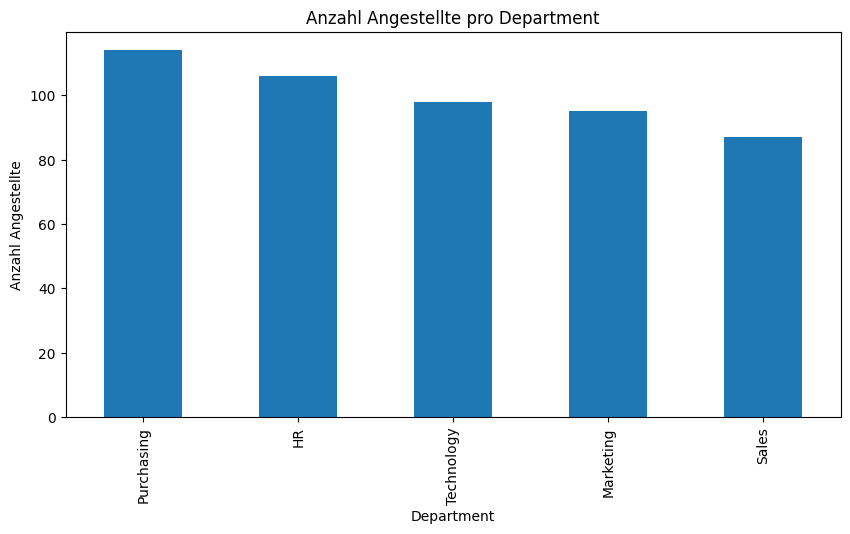

In [182]:
# Ihre Lösung
df.groupby('department').size()

df['department'].value_counts().plot.bar(
    figsize=(10,5), 
    title="Anzahl Angestellte pro Department",
    xlabel="Department", 
    ylabel="Anzahl Angestellte")
plt.show()

**Unterscheidet sich die durchschnittliche Anzahl Awards, in Abhängigkeit von der Ausbildung, stark?**

Erstellen Sie hierfür wiederum ein Säulendiagramm.

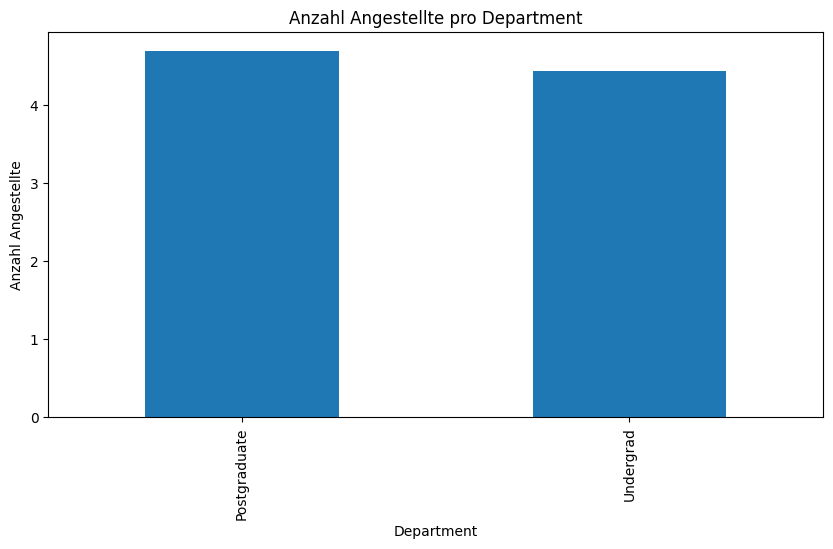

In [191]:
# Ihre Lösung
df.groupby('education')['awards'].mean().plot.bar(
    figsize=(10,5), 
    title="Durchschnittliche Anzahl Ratings pro Ausbildungs-Typ",
    xlabel="Ausbildungstyp", 
    ylabel="Durchschnittliche Anzahl Awards")
plt.show()

### Liniendiagramm

**Steigt das durchschnittliche Alter pro Job-Level, fällt es oder bleibt es ungefähr gleich?**

Beantworten Sie diese Frage mithilfe eines Liniendiagramms.

job_level
1    40.442105
2    40.163636
3    39.597561
4    38.745455
5    39.592233
Name: age, dtype: float64


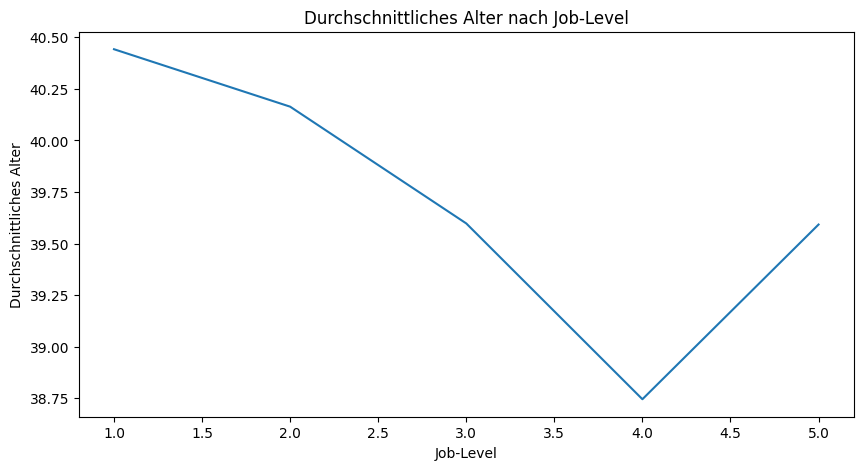

In [200]:
# Ihre Lösung
data = df.groupby('job_level')['age'].mean()
print(data)
data.plot.line(
    figsize=(10,5), 
    title="Durchschnittliches Alter nach Job-Level",
    xlabel="Job-Level", 
    ylabel="Durchschnittliches Alter")
'''
df.groupby('job_level')['age'].mean()
.plot(kind="line", 
figsize=(10,5), 
title="Durchschnittliches Alter nach Job-Level",
xlabel="Job-Level", 
ylabel="Durchschnittliches Alter")
'''
plt.show()

**Verändert sich das Recruiting über die Jahre?**

Erstellen Sie hierzu ein Liniendiagramm, das die Anzahl der Angestellten über die Zeit (`entry_date`) in Abhängigkeit vom Recruitment-Typ darstellt.

recruitment_type,On-Campus,Recruitment Agency,Referral,Walk-in
entry_date,,,,
2004,6,1,6,15
2005,5,3,11,10
2006,4,3,10,10
2007,10,3,9,12
2008,8,6,8,12
2009,7,7,6,11
2010,4,5,6,10
2011,2,6,4,8
2012,4,6,8,6


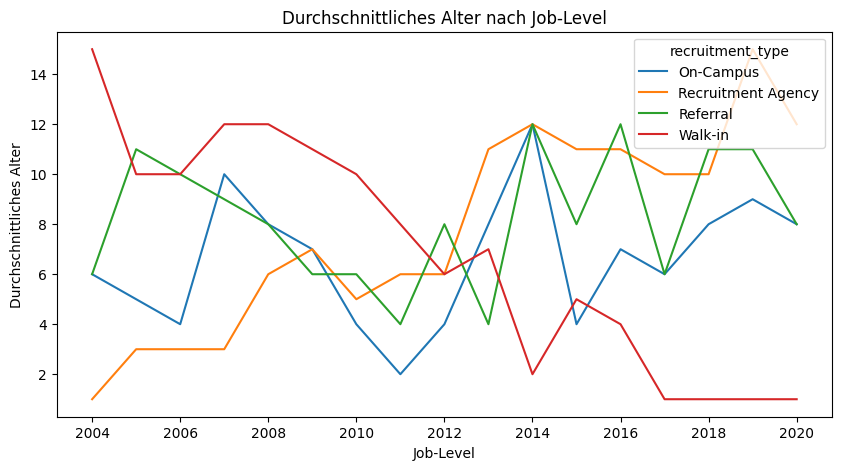

In [231]:
# Ihre Lösung
data = df.groupby([df["entry_date"].dt.year, df["recruitment_type"]]).size().unstack("recruitment_type")
#df.groupby(pd.Grouper(key='entry_date', axis=0, freq='Y')).size()
display(data)
data.plot(kind="line", 
figsize=(10,5), 
title="Durchschnittliches Alter nach Job-Level",
xlabel="Job-Level", 
ylabel="Durchschnittliches Alter")
plt.show()

**Sind Angestellte mit einem höheren Gehalt im Schnitt zufriedener?**

Erstellen Sie hierzu ein Liniendiagramm, das pro Gehaltsklasse die durchschnittliche Zufriedenheit angibt.

salary
21668.4    0.694737
26824.5    0.709091
38177.1    0.731707
59143.5    0.681818
78075.0    0.757282
Name: satisfied, dtype: float64

Index([21668.4, 26824.5, 38177.1, 59143.5, 78075.0], dtype='float64', name='salary')

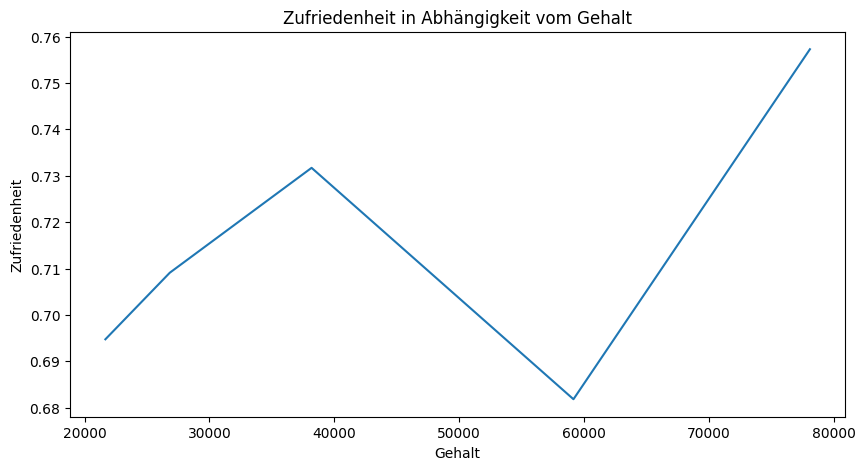

In [235]:
# Ihre Lösung

data = df.groupby('salary')['satisfied'].mean()
display(data)
display(data.index)

data.plot(kind="line", 
figsize=(10,5), 
title="Zufriedenheit in Abhängigkeit vom Gehalt", 
xlabel="Gehalt",
ylabel="Zufriedenheit")
plt.show()

**Sind Angestellte, die schon länger in der Firma sind, im Schnitt zufriedener?**

Beantworten Sie diese Frage ebenfalls mithilfe eines Liniendiagramms. Gruppieren Sie die Angestellten dafür nach dem Einstellungsjahr (`df["entry_date"].dt.year`).

entry_date
2004    0.714286
2005    0.862069
2006    0.703704
2007    0.764706
2008    0.823529
2009    0.612903
2010    0.600000
2011    0.850000
2012    0.541667
2013    0.633333
2014    0.710526
2015    0.750000
2016    0.735294
2017    0.739130
2018    0.600000
2019    0.833333
2020    0.620690
Name: satisfied, dtype: float64

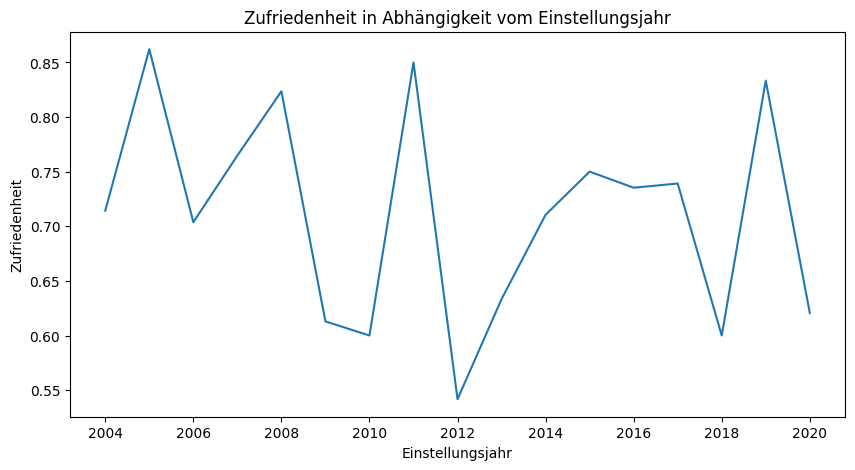

In [241]:
# Ihre Lösung
data = df.groupby(df['entry_date'].dt.year)['satisfied'].mean()
display(data)

data.plot(kind="line", 
figsize=(10,5), 
title="Zufriedenheit in Abhängigkeit vom Einstellungsjahr", 
xlabel="Einstellungsjahr",
ylabel="Zufriedenheit")
plt.show()

### Kreisdiagramm

**Gibt es Abteilungen, in denen mehr Frauen als Männer arbeiten?**

Beantworten Sie diese Frage mithilfe von Kreisdiagrammen (ein Kreisdiagramm pro Abteilung).

department,HR,Marketing,Purchasing,Sales,Technology
gender,,,,,
Female,59.0,40.0,47.0,42.0,45.0
Male,46.0,54.0,67.0,45.0,52.0
Unknown,1.0,1.0,NaN,NaN,1.0


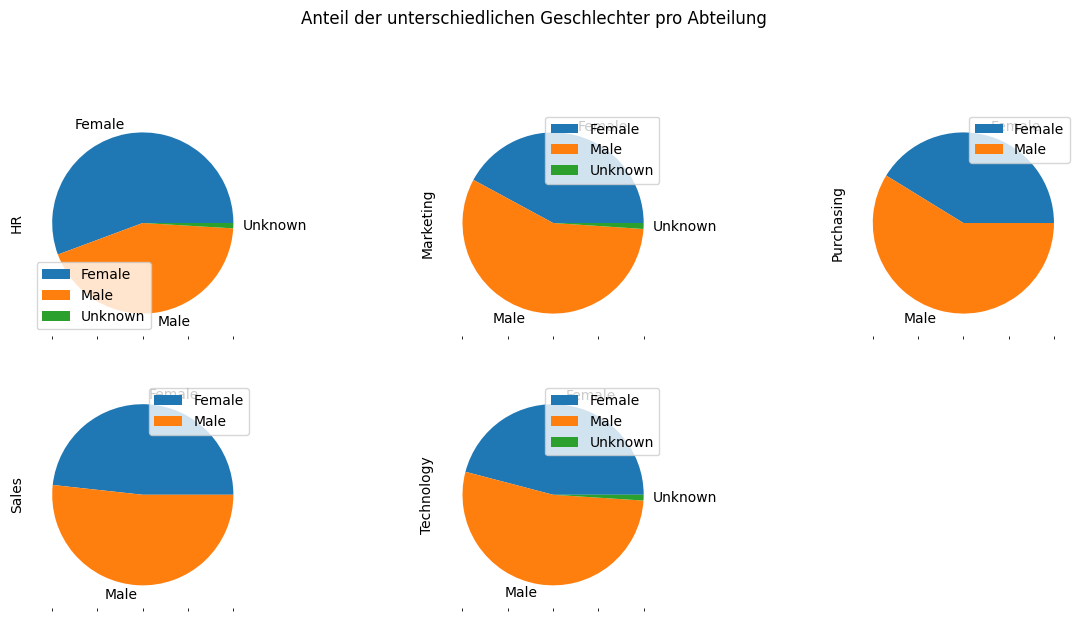

In [254]:
# Ihre Lösung
data = df.groupby(['gender','department']).size().unstack('department')
display(data)

data.plot(kind="pie", 
figsize=(15,10), 
layout=(3, 3),
title="Anteil der unterschiedlichen Geschlechter pro Abteilung",
subplots=True)
plt.show()